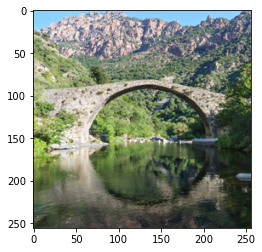

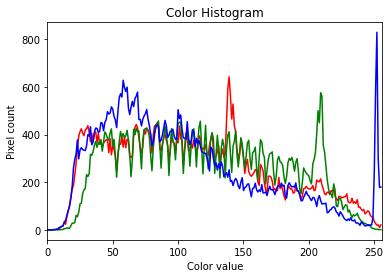

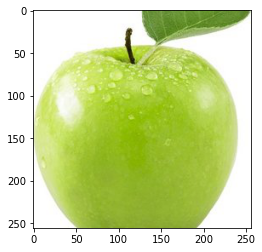

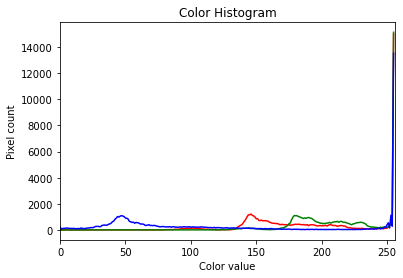

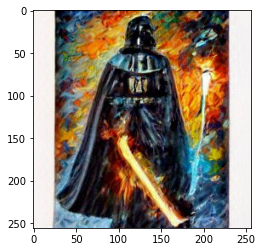

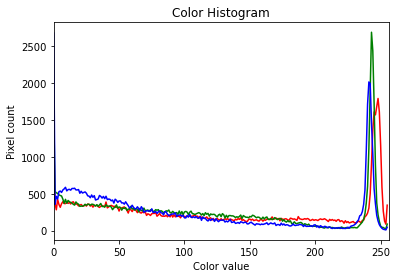

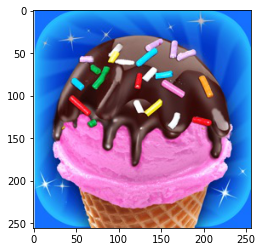

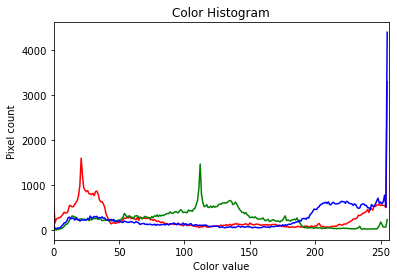

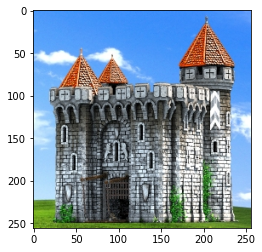

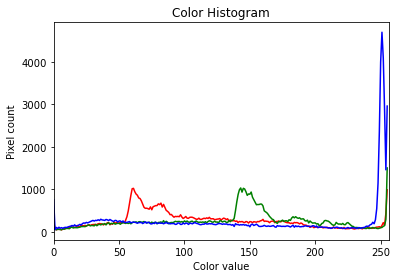

In [40]:
# Exercise 1

# imports
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# urls of selected pictures
urls = ["https://cdn-5bdd7293f911c8129c34a104.closte.com/wp-content/uploads/2018/12/000.jpg",
       "https://d2q79iu7y748jz.cloudfront.net/s/_squarelogo/256x256/ff4c2160a7b2c203bf7dbc36cbdee193",
       "https://preview.redd.it/8tzzfe6j1lk91.jpg?width=256&format=pjpg&auto=webp&s=3af8e745475bb4294b6660668f70aae9b5e89d1c",
       "https://is3-ssl.mzstatic.com/image/thumb/Purple113/v4/97/7b/4c/977b4cf0-312f-2481-80d8-8af3e2d58f59/source/256x256bb.jpg",
       "https://static.wikia.nocookie.net/ageofempires/images/3/36/Castle_aoe2DE.png/revision/latest?cb=20200403062723"]

# the process is same for all the images, hence the for loop
for i in range(5):
    
    # read the images
    image = skimage.io.imread(fname=urls[i])
    fig, ax = plt.subplots()
    plt.imshow(image)
    #plt.show()
    
    # tuple to select colors of each channel line
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)

    # create the histogram plot, with three lines, one for each color
    plt.figure()
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)
        

    plt.title("Color Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")
    # source: https://datacarpentry.org/image-processing/05-creating-histograms/
        


In [43]:
# Exercise 2

colors = ["red","green","blue"]

# create variant to store pixel values

pix = np.empty((256, 256))
        
# also for standardized standardized data

pix_new = np.empty((256, 256))

for i in range(5):
    print("\n\nPicture ", i+1,"\n")
    
    # read the images
    image = skimage.io.imread(fname=urls[i])
    
    # convert picture to array
    arr = np.array(image)
     
    for j in range(3):
        print('\n', colors[j], '\n')
        for k in range(256):
            for l in range(256):
                # store pixel values into variant
                pix[k, l] = arr[k, l][j]
        
        # print array to check if needed
        # print(pix)
        
        # calculate mean and standard deviation
        mean = np.mean(pix)
        std = np.std(pix)
        print("mean = ", mean)
        print("standard deviation = ", std)
        
        # formula for setting mean to 0 and standard deviation to 1
        # source: https://stats.stackexchange.com/questions/46429/transform-data-to-desired-mean-and-standard-deviation
        pix_new = (pix - mean) / std
        mean_new = np.mean(pix_new)
        std_new = np.std(pix_new)
        print("new mean = ", mean_new)
        print("new standard deviation = ", std_new)



Picture  1 


 red 

mean =  111.65835571289062
standard deviation =  59.19048924012854
new mean =  1.3877787807814457e-17
new standard deviation =  1.0

 green 

mean =  121.039306640625
standard deviation =  56.88061156990251
new mean =  1.3877787807814457e-17
new standard deviation =  1.0

 blue 

mean =  103.74789428710938
standard deviation =  59.7692840880253
new mean =  -2.7755575615628914e-17
new standard deviation =  1.0


Picture  2 


 red 

mean =  191.93275451660156
standard deviation =  47.276909591888625
new mean =  3.122502256758253e-17
new standard deviation =  1.0

 green 

mean =  213.68072509765625
standard deviation =  33.65902440487983
new mean =  5.551115123125783e-17
new standard deviation =  1.0

 blue 

mean =  123.47721862792969
standard deviation =  88.44696214179774
new mean =  7.806255641895632e-18
new standard deviation =  1.0


Picture  3 


 red 

mean =  126.41972351074219
standard deviation =  88.44058247317821
new mean =  3.469446951953614e-18
new 

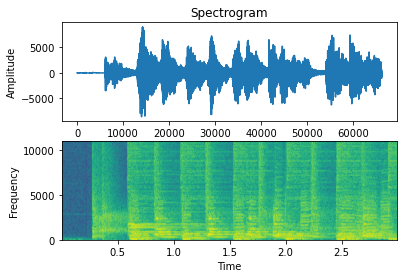

C:\Users\porda\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


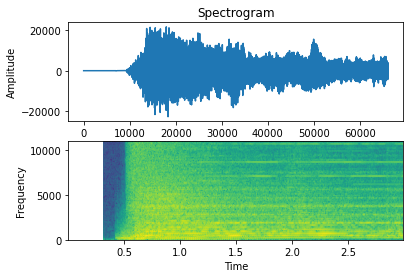

In [54]:
# Exercise 3

# source: https://pythontic.com/visualization/signals/spectrogram

#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot
from scipy.io import wavfile

# file paths
paths = ['C:\\Users\\porda\\Downloads\\CantinaBand3.wav', 'C:\\Users\\porda\\Downloads\\StarWars3.wav']
# I am aware that this is accessing files from my PC, but I couldn't find a way to import sound from an url,
# despite having tried for hours. In lack of a better solution, here are links for the files I used:
# https://www2.cs.uic.edu/~i101/SoundFiles/StarWars3.wav
# https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand3.wav

for i in range(2):
    # Read the wav file
    samplingFrequency, signalData = wavfile.read(paths[i])

    # Plot the signal read from wav file
    plot.subplot(211)
    plot.title('Spectrogram')
    plot.plot(signalData)
    plot.xlabel('Sample')
    plot.ylabel('Amplitude')

    plot.subplot(212)
    plot.specgram(signalData,Fs=samplingFrequency)
    plot.xlabel('Time')
    plot.ylabel('Frequency')

    plot.show()

In [62]:
# Exercise 4

for i in range(2):
    print("\nFile ", i+1,"\n")
    samplingFrequency, signalData = wavfile.read(paths[i])

    # convert wav to array
    arr = np.array(signalData)
    # print array to check if needed
    # print(arr)

    avg = np.mean(arr)
    std = np.std(arr)
    print("average = ", avg)
    print("standard deviation = ", std)
    
    # formula for setting mean to 0 and standard deviation to 1, same as before
    # source: https://stats.stackexchange.com/questions/46429/transform-data-to-desired-mean-and-standard-deviation
    arr_new = (arr - avg) / std
    avg_new = np.mean(arr_new)
    std_new = np.std(arr_new)
    print("new average = ", avg_new)
    print("new standard deviation = ", std_new, "\n")


File  1 

average =  -2.556130007558579
standard deviation =  1375.4416663795082
new average =  6.444832070386396e-19
new standard deviation =  1.0000000000000002 


File  2 

average =  4.491156462585034
standard deviation =  3801.1987188201024
new average =  -1.6555162380805056e-17
new standard deviation =  0.9999999999999999 



 

Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT


















































Languages


Magyar

English







Menü be/kikapcsolás











                            RÓLUNK
                        

Laborunkról
Munkatársaink
Média megjelenések






                            MEGOLDÁSAINK
                        

Profivox magyar nyelvű felolvasó (korpuszos)
Profivox magyar nyelvű felolvasó (DNN)
Profivox magyar nyelvű felolvasó (HMM)
Profivox magyar nyelvű felolvasó (diádos,triádos)
StrokeAid

Alkalmazások

Jaws for Windows integráció
Időjárás mindenkinek (magyar, Windows 8)
AALFred (5 nyelven, Windows 8.1)
Robobraille
Beszélő ATM-ek

Gyógyszervonal (OGYI)

Árlista felolvasó (T-mobile)
Keleti pályaudvar bemondórendszere
Mindenség elmélete c. film gépi beszéd szinkron








                            K+F
                        


Kutatási projektek (folyamatban)
Kutatási projektek (befejezett)
Publikációk (összes)
Publ

C:\Users\porda\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


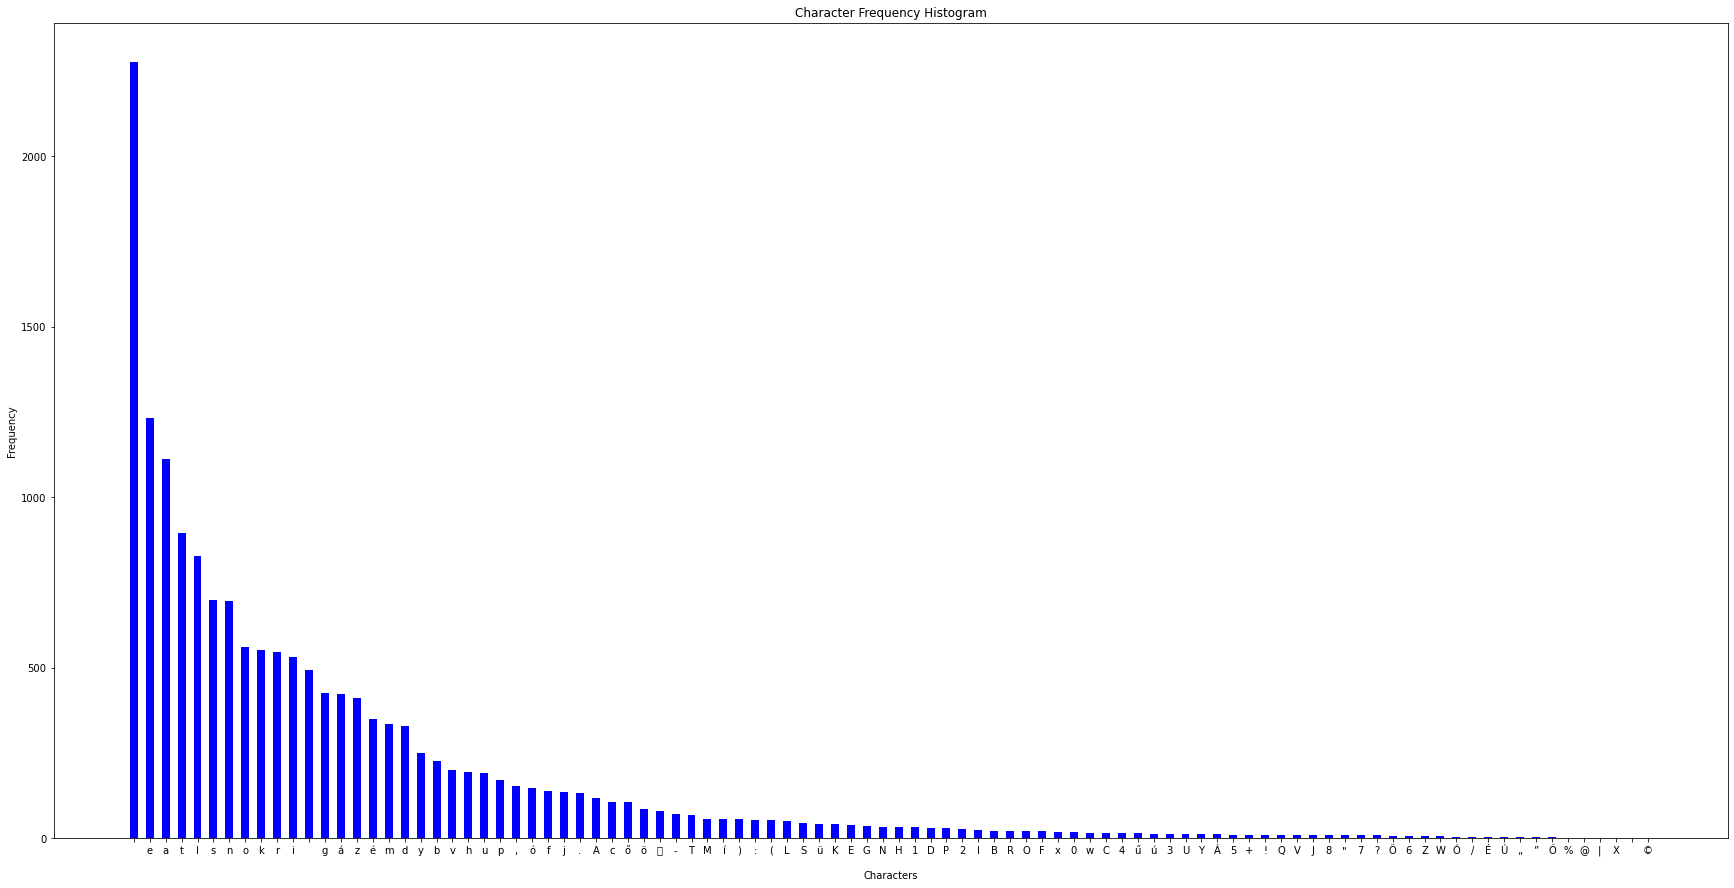

In [84]:
# Exercise 5
import requests
from bs4 import BeautifulSoup

url = 'http://smartlab.tmit.bme.hu/oktatas-deep-learning'
content = requests.get(url)
text = BeautifulSoup(content.text)
print(text.text)

# source: https://stackoverflow.com/questions/66253079/conversion-of-a-webpage-to-text

from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

c = Counter(text.text)
plt.rcParams["figure.figsize"] = (30, 15)
plt.bar(*zip(*c.most_common()), width=.5, color='b')
plt.title("Character Frequency Histogram")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

# source: https://stackoverflow.com/questions/52474028/letter-frequencies-plot-a-histogram-ordering-the-values-python